In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [ ]:
# CSV 파일 불러오기
file_path = '/content/drive/MyDrive/Colab Notebooks/2023_2_ML/20232ML_data/unmon2.csv' # replace with your absolute path of data on your drive
data = pd.read_csv(file_path)

In [ ]:
data = data.T

In [ ]:
data.iloc[0, :]

0         total_outgoing_pkt_per_user
1         total_incoming_pkt_per_user
2          outgoing_pkt_frac_per_user
3          incoming_pkt_frac_per_user
4                 outgoing30_per_user
5                 incoming30_per_user
6            avg_total_burst_per_user
7            std_total_burst_per_user
8            max_total_burst_per_user
9         avg_incoming_burst_per_user
10        std_incoming_burst_per_user
11        min_incoming_burst_per_user
12        avg_outgoing_burst_per_user
13        std_outgoing_burst_per_user
14        max_outgoing_burst_per_user
15                     avg_cumulative
16                     std_cumulative
17                     min_cumulative
18                       avg_interval
19                       std_interval
20                       max_interval
21             avg_pkts_in_fixed_time
22             std_pkts_in_fixed_time
23             min_pkts_in_fixed_time
24             max_pkts_in_fixed_time
25       avg_sum_intervals_continuous
26       std

In [ ]:
# 첫 번째 행 삭제
X = data.drop(data.index[0])  # 첫 번째 행 삭제

X.shape

(29000, 35)

In [ ]:
# 정답 데이터 y 생성
num_elements = 200
num_repeats = 95

y = np.repeat(np.arange(95), num_elements)
y = np.append(y, np.full(10000, -1))  # -1을 10000번 추가
# 데이터 확인
#print(len(y))  # y 배열의 길이 확인
print(y)

[ 0  0  0 ... -1 -1 -1]


In [ ]:
# 데이터 표준화 (Standard Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

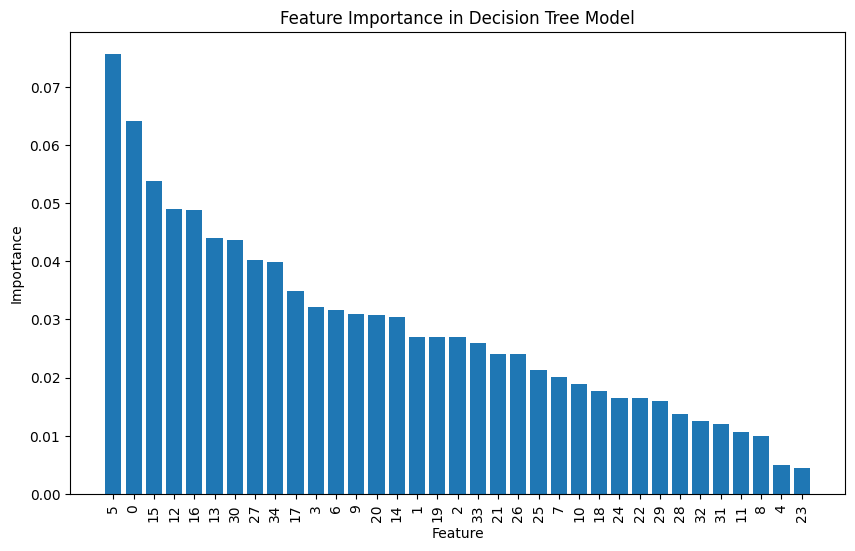

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# 결정 트리 모델 초기화 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 특성 중요도 확인
feature_importance = model.feature_importances_

# 중요도를 내림차순으로 정렬하여 시각화
sorted_idx = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_columns = X.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), sorted_feature_importance, align='center')
plt.xticks(range(X.shape[1]), sorted_columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.show()

In [ ]:
# All features
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest Accuracy: {accuracy}')

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average = "macro")
recall = recall_score(y_test, y_pred, average = "macro")

print(f'{precision} {recall}')

Random Forest Accuracy: 0.7779310344827586
0.802029867458128 0.6831845342774243


In [ ]:
# Top 5
selected_features_indices = [5,0,15,12,16]

# 데이터 표준화 (Standard Scaling)
scaler = StandardScaler()

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X = X.iloc[:, selected_features_indices]  # 특성 데이터

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest 모델 초기화 및 학습
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest Accuracy: {accuracy}')

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average = "macro")
recall = recall_score(y_test, y_pred, average = "macro")

print(f'{precision} {recall}')

Random Forest Accuracy: 0.6929310344827586
0.6839911416385767 0.6163672600407023


In [ ]:
# Top25
selected_features_indices = [5,0,15,12,16,13,30,27,34,17,3,6,9,20,14,1,19,2,33,21,26,25,7,10,18]

# 데이터 표준화 (Standard Scaling)
scaler = StandardScaler()

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X = X.iloc[:, selected_features_indices]  # 특성 데이터

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest 모델 초기화 및 학습
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest Accuracy: {accuracy}')

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average = "macro")
recall = recall_score(y_test, y_pred, average = "macro")

print(f'{precision} {recall}')

Random Forest Accuracy: 0.7846551724137931
0.8075846720158367 0.6948061570705844
